Consider the Ozone data set

Split the data into a training set (70%) and a test set (30%). Fit a
linear model on the training data, using the cube root of ozone
concentration as the response and temperature, wind speed,
and radiation as the predictors. Report the results.

In [1]:
data = read.delim(file = file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS503/hw/hw3/ozone_data.txt"))

In [2]:
dim(data)

[1] 111   4

In [3]:
head(data)

ozone,radiation,temperature,wind
41,190,67,7.4
36,118,72,8.0
12,149,74,12.6
18,313,62,11.5
23,299,65,8.6
19,99,59,13.8


In [4]:
n = dim(data)[1]
train_id = sample(seq(1, n, 1), floor(n*0.7))
test = data[-train_id, ]
train = data[train_id, ]

In [5]:
lmod = lm(formula = ozone^(1/3) ~ radiation + temperature + wind, data=train)

In [5]:
lmod1 = lm(formula = ozone ~ radiation + temperature + wind, data=train)

In [6]:
summary(lmod)


Call:
lm(formula = ozone^(1/3) ~ radiation + temperature + wind, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11733 -0.36106 -0.04297  0.23647  1.51661 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.6627028  0.7104030  -0.933   0.3540    
radiation    0.0016658  0.0007306   2.280   0.0255 *  
temperature  0.0559552  0.0078753   7.105 6.65e-10 ***
wind        -0.0779103  0.0198940  -3.916   0.0002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.508 on 73 degrees of freedom
Multiple R-squared:  0.6831,	Adjusted R-squared:   0.67 
F-statistic: 52.44 on 3 and 73 DF,  p-value: < 2.2e-16


In [6]:
summary(lmod1)


Call:
lm(formula = ozone ~ radiation + temperature + wind, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.336 -13.710  -3.586   9.506  92.678 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43.25548   28.97314  -1.493   0.1398    
radiation     0.07009    0.03030   2.313   0.0235 *  
temperature   1.42051    0.32536   4.366 4.10e-05 ***
wind         -3.87234    0.82463  -4.696 1.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.96 on 73 degrees of freedom
Multiple R-squared:  0.5694,	Adjusted R-squared:  0.5517 
F-statistic: 32.17 on 3 and 73 DF,  p-value: 2.318e-13


Fit a GAM on the training data, using the cube root of ozone
concentration as the response and temperature, wind speed,
and radiation as the predictors. Plot the results, and explain
your findings.

We use mgcv::gam (caret method = “gam”), because it automates the search for degrees of freedom (providing a reasonable model without a lot of fuss). The cross validation results indicate that the Generalized Additive Model (GAM) has lower Mean Squared Error (MSE) than the Generalized Linear Model (GLM). This is likely caused by non-linear effects associated with predictors like Expend.

In [7]:
library(caret)
library(dplyr)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
dim(train_y)

ERROR: Error in eval(expr, envir, enclos): object 'train_y' not found


In [9]:
train_x = train %>% select("radiation", "temperature", "wind")
train_y = train %>% select("ozone")

In [10]:
trControl = trainControl("repeatedcv", number = 10, repeats = 3)
model.gam = train(ozone^(1/3) ~ radiation + temperature + wind, data=train, method = "gam", trControl = trControl)

Loading required package: mgcv
Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


In [11]:
model.gam$results

select,method,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
FALSE,GCV.Cp,0.5515170,0.6795564,0.4327670,0.1563984,0.1270956,0.1177021
TRUE,GCV.Cp,0.5376137,0.6771272,0.4192099,0.1443660,0.1314614,0.1085904


In [12]:
library(gam)

Warning message:
"package 'gam' was built under R version 3.6.2"Loading required package: splines
Loading required package: foreach
Loaded gam 1.16.1


Attaching package: 'gam'

The following objects are masked from 'package:mgcv':

    gam, gam.control, gam.fit, s



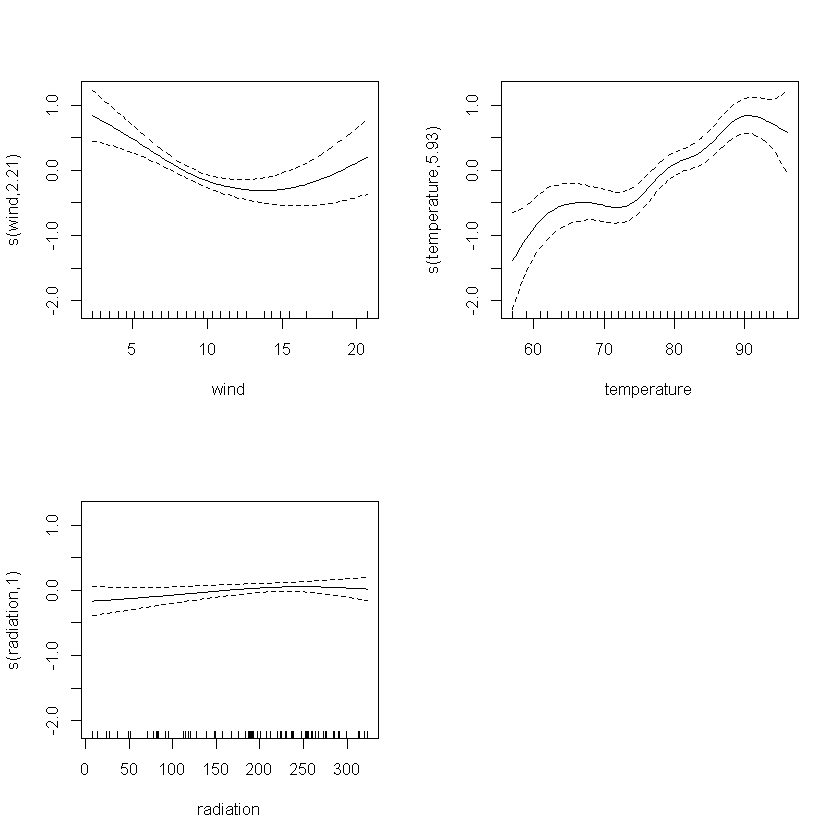

In [18]:
par(mfrow = c(2, 2))
plot(model.gam$finalModel)

In [17]:
model.gam$finalModel


Family: gaussian 
Link function: identity 

Formula:
.outcome ~ s(wind) + s(temperature) + s(radiation)

Estimated degrees of freedom:
2.21 5.93 1.00  total = 10.14 

GCV score: 0.2391901     

In [23]:
gam2 = gam(ozone^(1/3) ~ ns(radiation, 3) + ns(temperature, 6) + ns(wind, 2), data=train)

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

In [21]:
gam1 = gam(ozone^(1/3) ~ s(radiation, 2.78) + s(temperature, 5.59) + s(wind, 2.28), data=train)

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

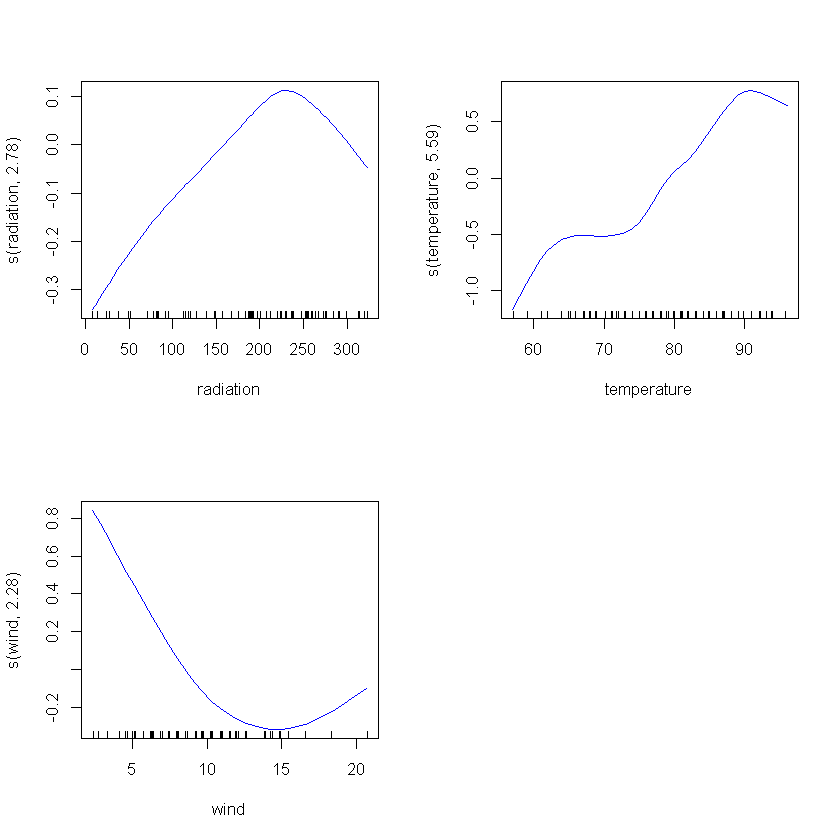

In [22]:
par(mfrow = c(2, 2))
plot(gam1 ,col="blue")

<font color="red">how to explain findings</font>

Evaluate both models on the test set, and explain the results.

**Linear model**

In [25]:
test_x = test %>% select("radiation", "temperature", "wind")
test_y = (test %>% select("ozone"))^(1/3)

In [27]:
linear_pred = predict(lmod, test_x)

In [43]:
mean((linear_pred - test_y$ozone)^2)

[1] 0.329556

In [51]:
dim(test_y)

[1] 34  1

In [52]:
sum((linear_pred - test_y$ozone)^2)/34

[1] 0.329556

In [49]:
mean((linear_pred - test_y$ozone))

[1] 0.09830955

In [47]:
(mean((linear_pred - test_y$ozone)^2))^2

[1] 0.1086072

GAM model

In [44]:
gam_pred = predict(gam1, test_x)

In [46]:
mean((gam_pred - test_y$ozone)^2)

[1] 0.3247809

In [26]:
gam_pred2 = predict(gam2, test_x)
mean((gam_pred2 - test_y$ozone)^2)

[1] 0.2569899

<font color="red">how to explain results</font>

For which variables, if any, is there evidence of a non-linear relationship
with the response?

<font color="red">check here</font>

In [53]:
summary(gam1)


Call: gam(formula = ozone^(1/3) ~ s(radiation, 2.78) + s(temperature, 
    5.59) + s(wind, 2.28), data = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-0.94414 -0.25837 -0.06349  0.25062  1.10810 

(Dispersion Parameter for gaussian family taken to be 0.1747)

    Null Deviance: 59.5449 on 76 degrees of freedom
Residual Deviance: 11.4173 on 65.3503 degrees of freedom
AIC: 96.8479 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df  Sum Sq Mean Sq F value    Pr(>F)    
s(radiation, 2.78)    1.00  8.5290  8.5290  48.818 1.786e-09 ***
s(temperature, 5.59)  1.00 25.2609 25.2609 144.588 < 2.2e-16 ***
s(wind, 2.28)         1.00  2.6477  2.6477  15.155 0.0002351 ***
Residuals            65.35 11.4173  0.1747                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
                     Npar Df  Npar F     Pr(F)    
(Intercept)                               

From GAM plots above, we could see thet all three predictors' degrees of freedom are larger than one. Further, from the summary of GAM model above, the p values for all three predictors are less than 0.05, indicating that all of them are significant for the response variable - Ozone. Thus, we could conclude that all three predictors has non-linear relationship with the response variable.    